1. 깃허브 자신의 계정에 수업과 숙제를 올린 소스코드만 참조가능

(그 외의 참조는 부정으로 간주 F처리)



데이터 로드  
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

데이터 확인  
print(data.head())

2. 해당 소스를 이용하여 ML 분류 RF, LR, DT

3. 해당 소스를 이용하여 FCNN

4. 해당 소스를 이용하여 CNN

5. 모든 소스에는 F1값 및 confusion matrix 표시

# Module Import

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

# Data Import

In [85]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# EDA 실행

## 결측치 확인

In [86]:
# 결측치 확인
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## 클래스 갯수 확인 (그래프, 레이블 갯수)

Text(0.5, 1.0, 'Car class')

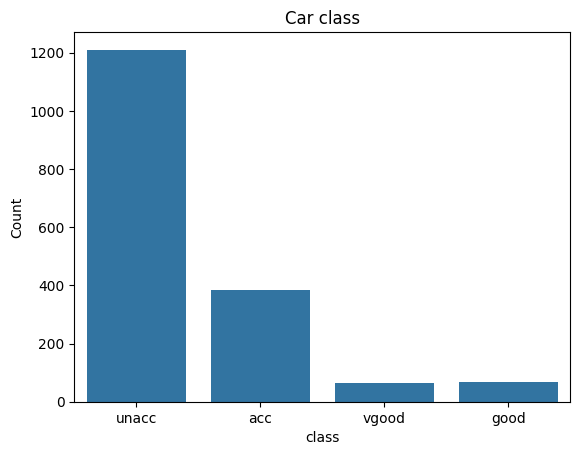

In [87]:
# 레이블 갯수 확인 (그래프)

sns.countplot(data = data, x="class")
plt.xlabel("class")
plt.ylabel("Count")
plt.title("Car class")

In [88]:
# 레이블 갯수 확인 (숫자)
data['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

## 라벨 인코드

In [89]:
# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

In [90]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [91]:
data['buying'].value_counts()

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

In [92]:
# 'label' 컬럼을 숫자로 변환
data['buying'] = label_encoder.fit_transform(data['buying'])

data['buying'].value_counts()

buying
3    432
0    432
2    432
1    432
Name: count, dtype: int64

In [93]:
data['maint'].value_counts()

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

In [94]:
# 'label' 컬럼을 숫자로 변환
data['maint'] = label_encoder.fit_transform(data['maint'])

data['maint'].value_counts()

maint
3    432
0    432
2    432
1    432
Name: count, dtype: int64

In [95]:
data['doors'].value_counts()

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

In [96]:
# 'label' 컬럼을 숫자로 변환
data['doors'] = label_encoder.fit_transform(data['doors'])

data['doors'].value_counts()

doors
0    432
1    432
2    432
3    432
Name: count, dtype: int64

In [97]:
# 'label' 컬럼을 숫자로 변환
data['persons'] = label_encoder.fit_transform(data['persons'])

data['persons'].value_counts()

persons
0    576
1    576
2    576
Name: count, dtype: int64

In [98]:
# 'label' 컬럼을 숫자로 변환
data['lug_boot'] = label_encoder.fit_transform(data['lug_boot'])

data['lug_boot'].value_counts()

lug_boot
2    576
1    576
0    576
Name: count, dtype: int64

In [99]:
# 'label' 컬럼을 숫자로 변환
data['safety'] = label_encoder.fit_transform(data['safety'])

data['safety'].value_counts()

safety
1    576
2    576
0    576
Name: count, dtype: int64

In [100]:
# 'label' 컬럼을 숫자로 변환
data['class'] = label_encoder.fit_transform(data['class'])

data['class'].value_counts()

class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

# Split X, Y

In [101]:
X = data.drop('class', axis = 1)
Y = data['class']

print(X.head())
print()
print(Y.value_counts())

   buying  maint  doors  persons  lug_boot  safety
0       3      3      0        0         2       1
1       3      3      0        0         2       2
2       3      3      0        0         2       0
3       3      3      0        0         1       1
4       3      3      0        0         1       2

class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64


# Data Scaling

In [102]:

# from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X

,buying,maint,doors,persons,lug_boot,safety
0,1.341641,1.341641,-1.341641,-1.224745,1.224745,0.000000
1,1.341641,1.341641,-1.341641,-1.224745,1.224745,1.224745
2,1.341641,1.341641,-1.341641,-1.224745,1.224745,-1.224745
3,1.341641,1.341641,-1.341641,-1.224745,0.000000,0.000000
4,1.341641,1.341641,-1.341641,-1.224745,0.000000,1.224745
...,...,...,...,...,...,...
1723,-0.447214,-0.447214,1.341641,1.224745,0.000000,1.224745
1724,-0.447214,-0.447214,1.341641,1.224745,0.000000,-1.224745
1725,-0.447214,-0.447214,1.341641,1.224745,-1.224745,0.000000
1726,-0.447214,-0.447214,1.341641,1.224745,-1.224745,1.224745


# Train데이터, Test데이터 나누기

In [103]:
# split X_train, Y_train, X_test, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 모델 정의, 학습, 예측

## RF

In [104]:
# RandomForest
clf = RandomForestClassifier(random_state=0)

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- RandomForest Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- RandomForest Classifier ---
0.9653179190751445
[[ 73   4   1   1]
 [  1  13   0   3]
 [  1   0 239   0]
 [  1   0   0   9]]


## LR

In [105]:
clf = LogisticRegression()

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- Logistic Regression Classifier ---
0.6502890173410405
[[  9   0  67   3]
 [  1   0  16   0]
 [ 22   0 214   4]
 [  2   0   6   2]]


## DT

In [106]:
clf = DecisionTreeClassifier(random_state = 0)

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- DecisionTree Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- DecisionTree Classifier ---
0.9682080924855492
[[ 71   4   4   0]
 [  0  17   0   0]
 [  2   0 238   0]
 [  1   0   0   9]]
